In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
#Reading data from csv file and setting date as an Index
data_tesla = pd.read_csv("Tesla_Stock.csv")
data_tesla['Date'] = pd.to_datetime(data_tesla['Date'])
data_tesla.set_index('Date',inplace=True)
data_tesla.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052
2012-01-04,28.21,28.67,27.50,27.71,630036
2012-01-05,27.76,27.93,26.85,27.12,1005432
2012-01-06,27.20,27.79,26.41,26.89,687081
2012-01-09,27.00,27.49,26.12,27.25,896951


In [3]:
data_ford = pd.read_csv('Ford_Stock.csv')
data_ford['Date'] = pd.to_datetime(data_ford['Date'])
data_ford.set_index('Date',inplace=True)
data_ford.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,11.00,11.25,10.99,11.13,45709811
2012-01-04,11.15,11.53,11.07,11.30,79725188
2012-01-05,11.33,11.63,11.24,11.59,67877467
2012-01-06,11.74,11.80,11.52,11.71,59840605
2012-01-09,11.83,11.95,11.70,11.80,53981467


In [4]:
data_GM = pd.read_csv('GM_Stock.csv')
data_GM['Date'] = pd.to_datetime(data_GM['Date'])
data_GM.set_index('Date',inplace=True)
data_GM.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,20.83,21.18,20.75,21.05,9321420
2012-01-04,21.05,21.37,20.75,21.15,7856752
2012-01-05,21.10,22.29,20.96,22.17,17884040
2012-01-06,22.26,23.03,22.24,22.92,18234608
2012-01-09,23.20,23.43,22.70,22.84,12091714


# Visualizing the data

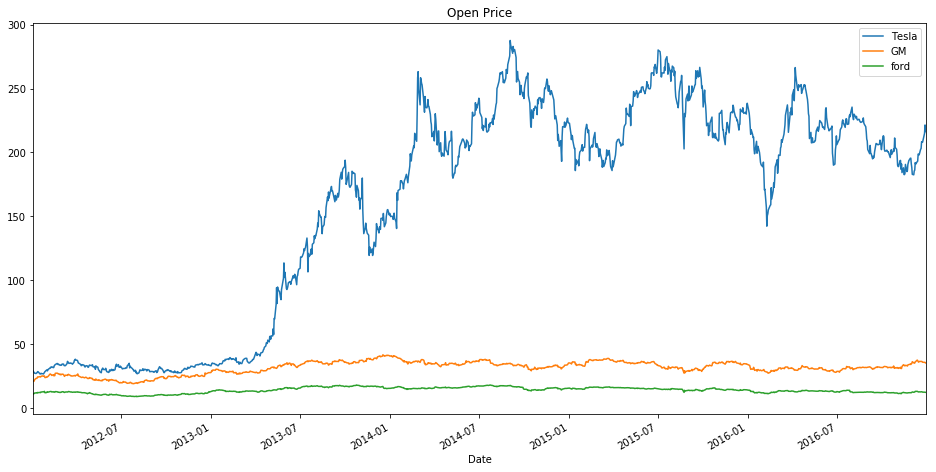

In [5]:
#plotting the open price for all the data
data_tesla['Open'].plot(figsize=(16,8),label='Tesla', title='Open Price',kind='line')
data_GM['Open'].plot(label='GM')
data_ford['Open'].plot(label='ford')
plt.legend()
plt.show()

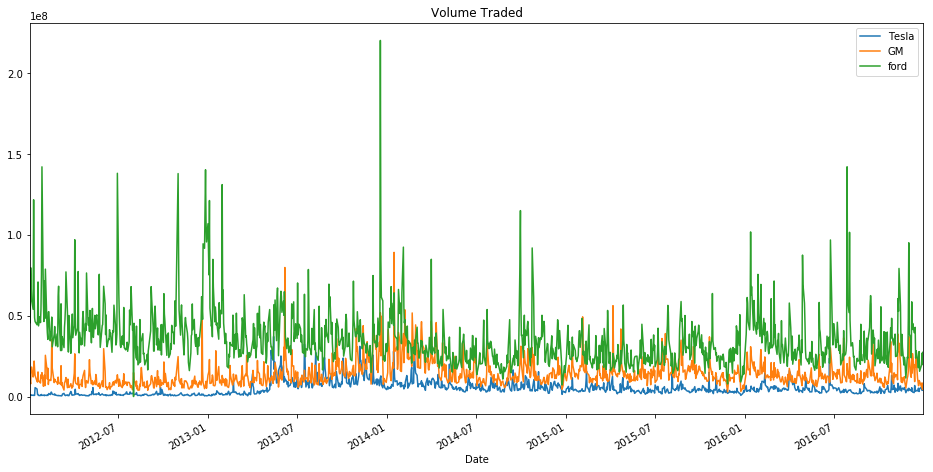

In [6]:
#Plotting the volume traded
data_tesla['Volume'].plot(figsize=(16,8),label='Tesla', title='Volume Traded')
data_GM['Volume'].plot(label='GM')
data_ford['Volume'].plot(label='ford')
plt.legend()
plt.show()

In [7]:
# It seems like ford has highest trading in 2013, lets see which day is it
data_ford['Volume'].argmax()

Timestamp('2013-12-18 00:00:00')

In [8]:
#Lets see the total traded data for all three car company by multiplying open with volume
data_tesla['Total Traded'] = data_tesla['Open']*data_tesla['Volume']
data_ford['Total Traded'] = data_ford['Open']*data_ford['Volume']
data_GM['Total Traded'] = data_GM['Open']*data_GM['Volume']

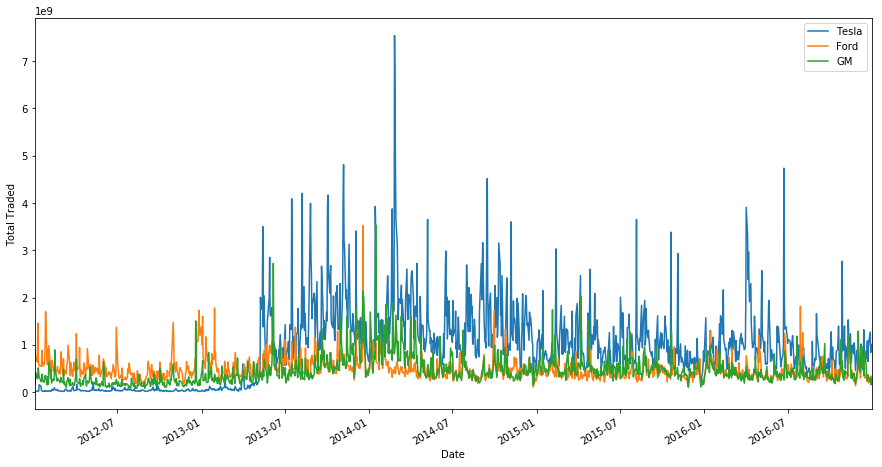

In [9]:
#Plotting total traded against the time index
data_tesla['Total Traded'].plot(label='Tesla',figsize=(15,8))
data_ford['Total Traded'].plot(label='Ford')
data_GM['Total Traded'].plot(label='GM')
plt.legend()
plt.ylabel('Total Traded')
plt.show()

In [10]:
#Again we can see there is a peak where trading is very high
data_tesla['Total Traded'].argmax()

Timestamp('2014-02-25 00:00:00')

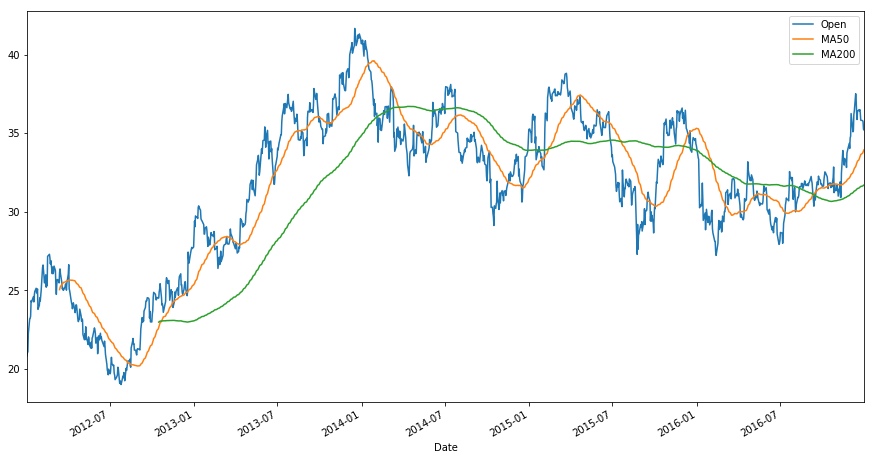

In [11]:
#Plotting the open data with rolling windows as 50 and 200 for Generel Motors
data_GM['MA50']= data_GM['Open'].rolling(50).mean()
data_GM['MA200']= data_GM['Open'].rolling(200).mean()
data_GM[['Open','MA50','MA200']].plot(figsize=(15,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9cb4c55a50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f9cb67b4090>]], dtype=object)

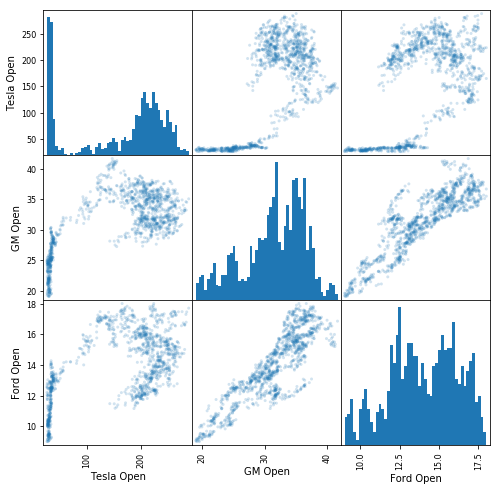

In [12]:
#Plotting the relationship between the stocks for all three car company using scatter plots
from pandas.plotting import scatter_matrix
data_combined = pd.concat([data_tesla['Open'],data_GM['Open'],data_ford['Open']],axis=1)#,columns = ['Tesla Open','GM Open','Ford Open'])
data_combined.columns = ['Tesla Open','GM Open','Ford Open']
scatter_matrix(data_combined, alpha=0.2, figsize=(8, 8), diagonal='hist',hist_kwds={'bins':50})